# Welcome our Team
for easier navigation here is the [link](https://) to final draft one
the 2nd draft is here [second draft ](https://colab.research.google.com/drive/1rZKSn0XnRl08NIXXCyFKeOg-2d7utPIe?usp=sharing)

##problems to solve
1. fitching the data (make sure it's reproducable)
2. let's see who is good about something regarding development
3. data must be a fancy, or sovling a good problem
4. show how we solved the pitfalls

levels:
1. data cleaning
2. data piplines
3. seeing the correlations and importance of features
4. deployment


#The DATA 😃

so as I told you it's better to ensure our data is stored somewhere and can be call at anytime

Problems I faced:

Modify the Shareable Link: these are the sharable link,

1. [train](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1DgVBjs09tUEtLKdrpL24amz4XcqAysvp%2Fview%3Fusp%3Dsharing)

2. [test](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1J5W75zPGVnf40quZKiZ7d5G8TlKGY88n%2Fview%3Fusp%3Dsharing)


The typical shareable link looks like this: bash Copy code https://drive.google.com/file/d/FILE_ID/view?usp=sharing Replace /view?usp=sharing with /export?format=tsv at the end. The modified link should look like this:

# to do list
1. usefulCount feature is considering the the drug useful counts or the review?
1. column of TF_IDF
2. Note the Random Forest can read string data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download(['punkt','stopwords'])
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
test_link = 'https://drive.google.com/uc?id=1J5W75zPGVnf40quZKiZ7d5G8TlKGY88n'
train_link = 'https://drive.google.com/uc?id=1DgVBjs09tUEtLKdrpL24amz4XcqAysvp'

train_df = pd.read_csv(train_link,delimiter='\t')
test_df = pd.read_csv(test_link, delimiter='\t')
df = pd.concat([train_df,test_df])
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


I'm just writing the possible new features can help
1. Positive review score (the positivity of the score, sentiment polarity, means that we will need to do NLP and sentiment analysis techniques in our reviews columns, alternative is to cosider to usefulcounts: I mean wheter to use it or the encode it. e.g we can say if the usefulcount is more than (any good thresould to considered as good let's say 5 out of 10 scale) then this review is positive)

# Exploring Time 🤓

In [ ]:
train_df.shape

(161297, 7)

In [ ]:
test_df.shape

(53766, 7)

In [ ]:
df.shape

(215063, 7)

In [ ]:
df.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [ ]:
df.columns.tolist()

['Unnamed: 0',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [ ]:
df.describe()
#yoo guys quick reminder that this method only reads the numerical columns

,Unnamed: 0,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
df.isnull().sum()

Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [ ]:
df.rating

0         9.0
1         8.0
2         5.0
3         8.0
4         9.0
         ... 
53761    10.0
53762     9.0
53763     8.0
53764     1.0
53765     9.0
Name: rating, Length: 215063, dtype: float64

In [ ]:
#let's check a columns by columns
len(df['Unnamed: 0'].unique())
#ok ID is unique

215063

In [ ]:
len(df['drugName'].unique())

3671

In [ ]:
df.condition #I think it is better to remove the instances

0        Left Ventricular Dysfunction
1                                ADHD
2                       Birth Control
3                       Birth Control
4                   Opiate Dependence
                     ...             
53761       Breast Cancer, Prevention
53762                         Anxiety
53763                   Birth Control
53764                            Pain
53765                        Sciatica
Name: condition, Length: 215063, dtype: object

In [ ]:
#We would also like the know with what kind of reviews we are dealing with, so that is what we did below
df['review'][1]

1    "My son is halfway through his fourth week of ...
1    "My son has Crohn&#039;s disease and has done ...
Name: review, dtype: object

In [ ]:
for i in range(5):
    print(df['review'][i])
    print('\n')
#lol I don't like the first review format

0    "It has no side effect, I take it in combinati...
0    "I&#039;ve tried a few antidepressants over th...
Name: review, dtype: object


1    "My son is halfway through his fourth week of ...
1    "My son has Crohn&#039;s disease and has done ...
Name: review, dtype: object


2    "I used to take another oral contraceptive, wh...
2                        "Quick reduction of symptoms"
Name: review, dtype: object


3    "This is my first time using any form of birth...
3    "Contrave combines drugs that were used for al...
Name: review, dtype: object


4    "Suboxone has completely turned my life around...
4    "I have been on this birth control for one cyc...
Name: review, dtype: object




# **Visualization ERA ✨ **

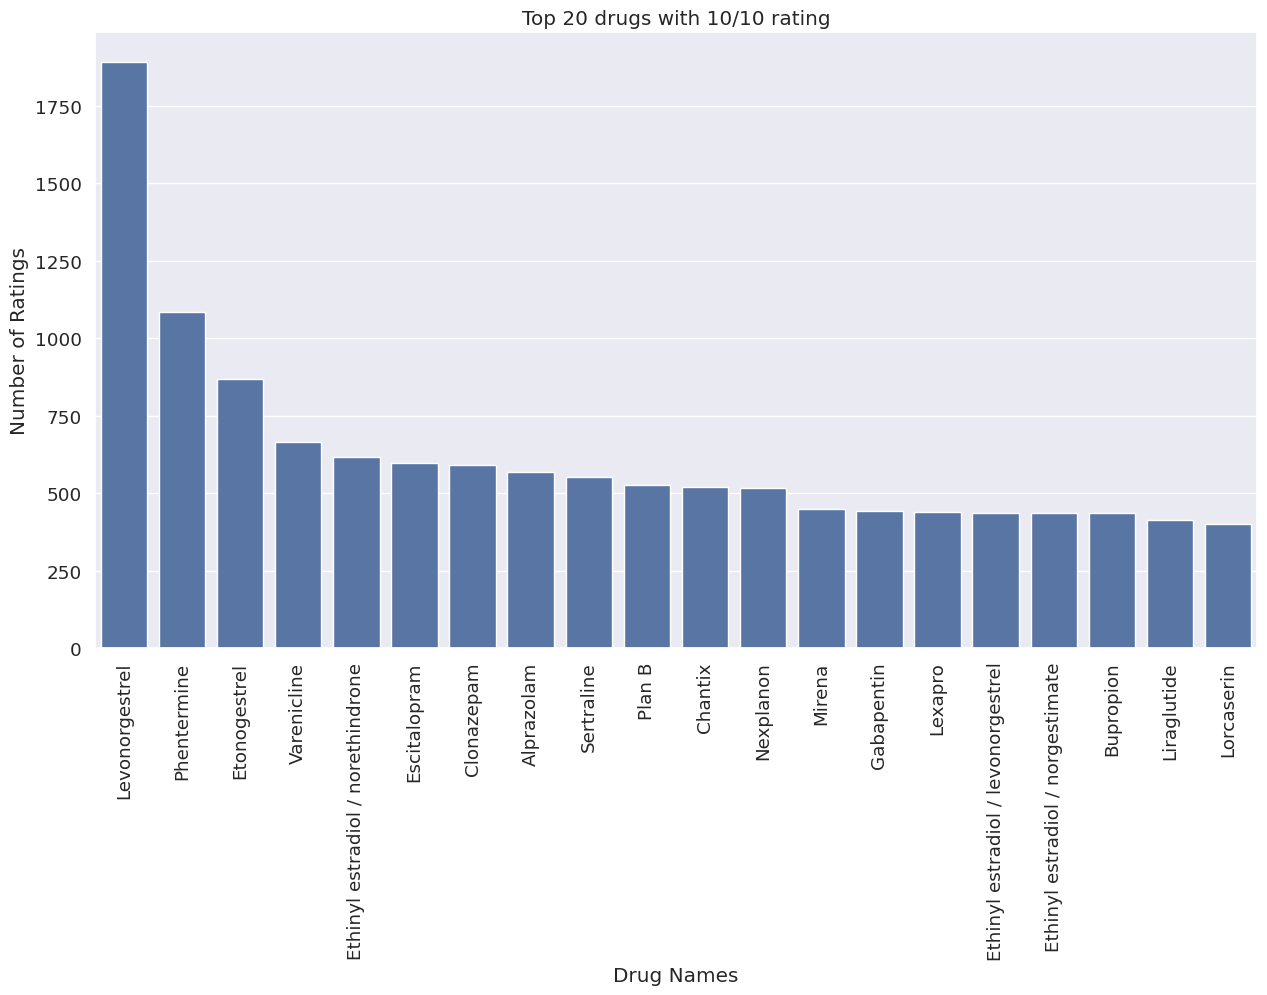

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ipython-input-21-f2f54c7b9be9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')


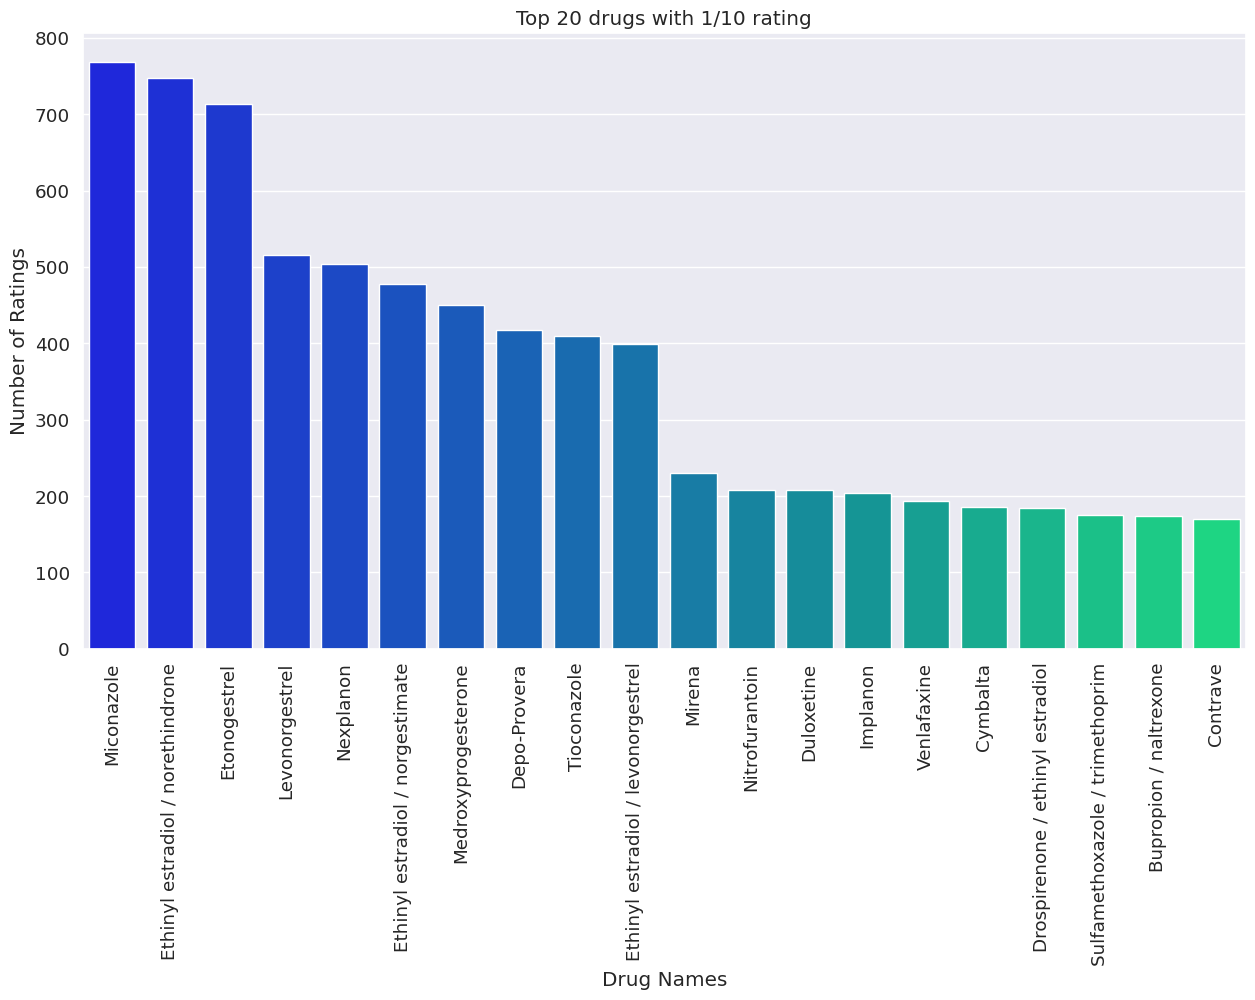

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

reminder that number of rating is just to see if there is a drug got extreme number of reviews like 200k to make sure our data is not weired, but anyways it's normal

<ipython-input-22-3463fa3067be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


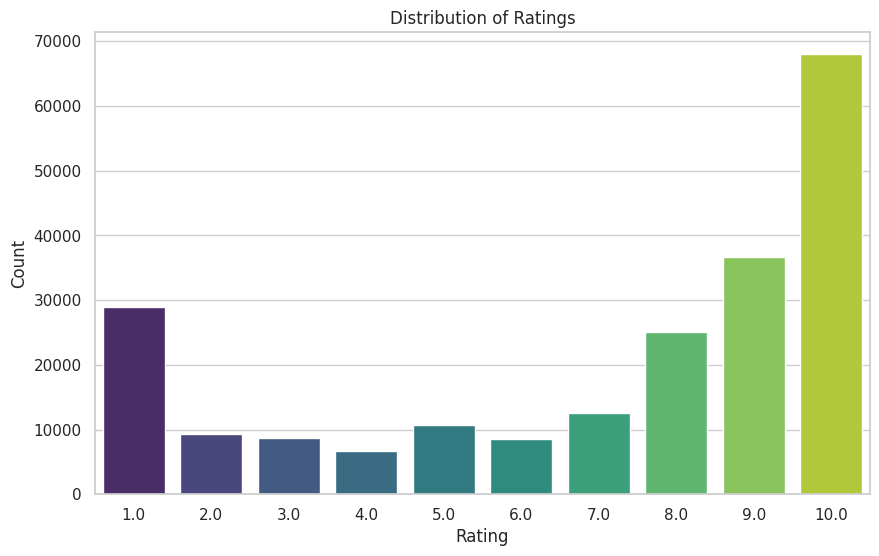

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


sns.countplot(x='rating', data=df, palette='viridis')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


In [ ]:
# converting the date into datetime format
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# now extracting year from date
df['Year'] = df['date'].dt.year
# extracting the month from the date
df['month'] = df['date'].dt.month

# extracting the days from the date
df['day'] = df['date'].dt.day

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'id',
                        'drugName': 'drug_name',
                        'condition': 'condition',
                        'review': 'review',
                        'rating': 'rating',
                        'usefulCount': 'useful_count'})
#somehow it's easier this way

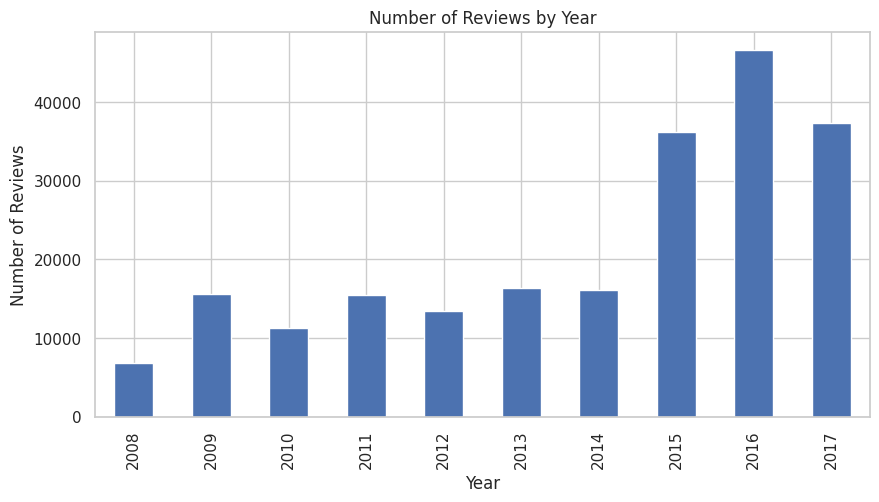

In [ ]:
#TBH 2016 was a good year

df.groupby('Year')['Year'].count().plot(kind = 'bar', figsize = (10, 5))
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Year')
plt.show()


<ipython-input-26-de071d53e0b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['useful_count'], color = 'orange')


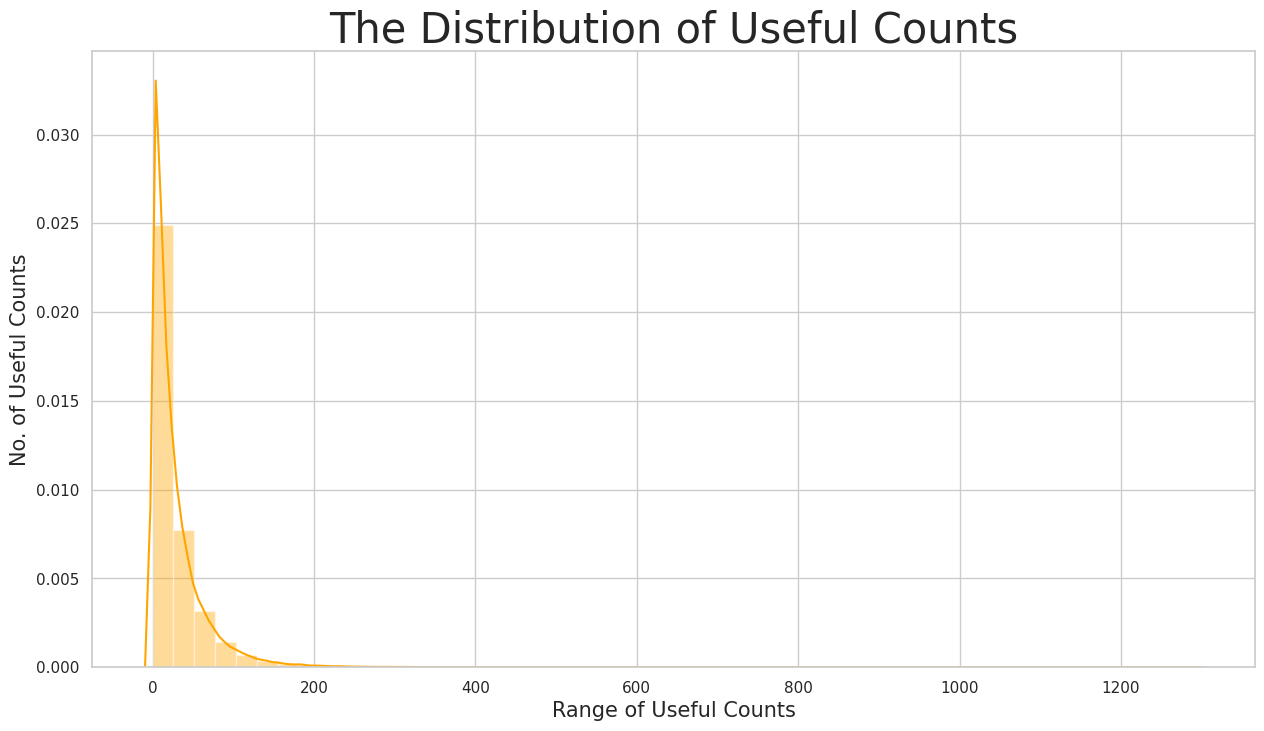

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(df['useful_count'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

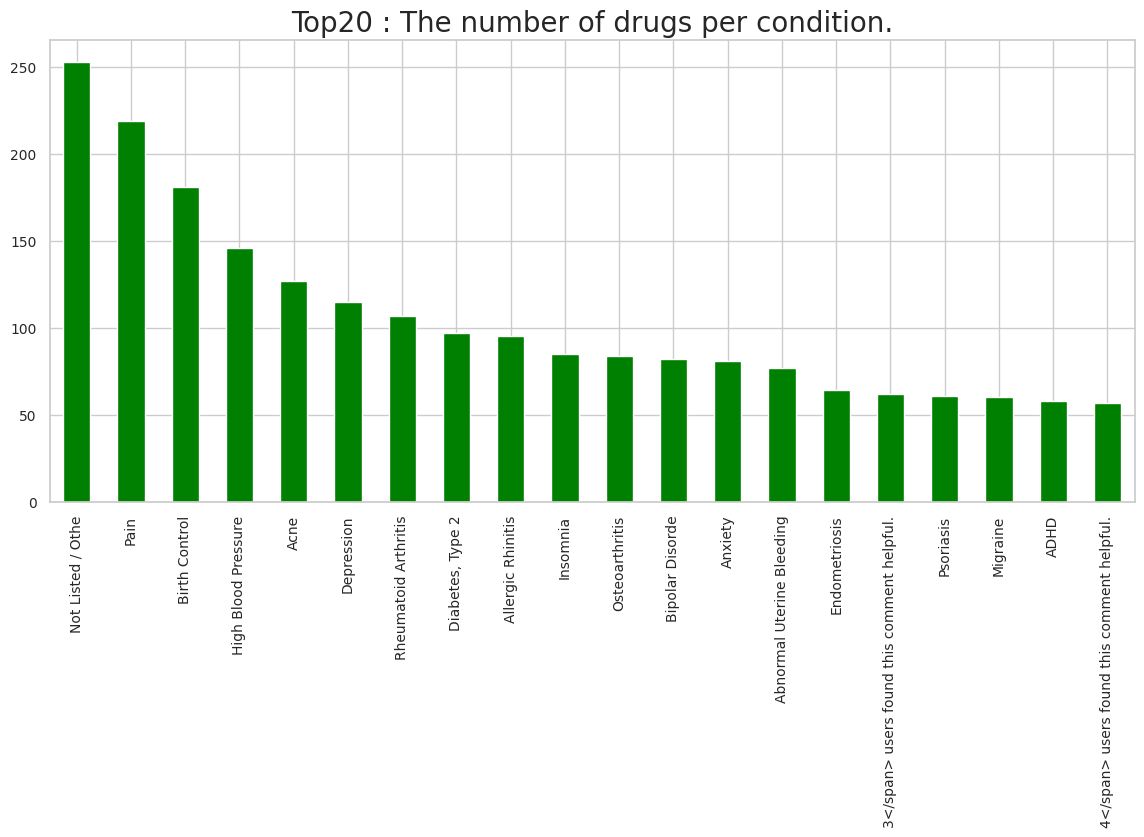

In [ ]:
condition_dn = df.groupby(['condition'])['drug_name'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [ ]:
Levonorgestrel = df.groupby('drug_name').get_group('Levonorgestrel')
Levonorgestrel['rating'].value_counts()
#lol indeed it's the best rating

10.0    1892
9.0      799
1.0      515
8.0      490
5.0      290
7.0      254
6.0      198
3.0      186
2.0      169
4.0      137
Name: rating, dtype: int64

In [ ]:
len(df['drug_name'].unique())
#so we have more than 3000 drug

3671

and yes it looks normal, typical reviews distribution is the same as this



Properties of our features

In [ ]:
no_condition = df[df['condition'].notna() & df['condition'].str.endswith('</span> users found this comment helpful.')]
no_condition

,id,drug_name,condition,review,rating,date,useful_count,Year,month,day
105,220696,Loestrin 24 Fe,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f...",3.0,2010-11-03,2,2010,11,3
196,67383,Provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1.0,2016-03-27,4,2016,3,27
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3.0,2010-06-01,3,2010,6,1
264,132965,Loestrin 24 Fe,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con...",2.0,2014-06-24,4,2014,6,24
391,91050,Norco,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger...",9.0,2009-03-15,11,2009,3,15
...,...,...,...,...,...,...,...,...,...,...
52443,133354,Tri-Sprintec,3</span> users found this comment helpful.,"""I have been taking this pill for less than a ...",8.0,2010-09-24,3,2010,9,24
53116,149494,Mirena,5</span> users found this comment helpful.,"""I got the Mirena put in last month. And holy ...",7.0,2013-02-12,5,2013,2,12
53287,91988,Lyrica,21</span> users found this comment helpful.,"""It was a nightmare.I had the worse side effec...",1.0,2015-04-14,21,2015,4,14
53353,174757,Dulera,28</span> users found this comment helpful.,"""My 10 year old son took Dulera for asthma. I...",1.0,2012-02-29,28,2012,2,29


In [ ]:
len(df['drug_name'].unique())

3671

# Converting Names and Data Types of Features

In [ ]:
df.head(4)

,id,drug_name,condition,review,rating,date,useful_count,Year,month,day
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,2012,5,20
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,2010,4,27
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,2009,12,14
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,2015,11,3


##Text Cleaning and Preprocessing

In [ ]:

#a code I found in kaggle for preprocessing text
def review_clean(review):
    # changing to lower case
    lower = review.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    iam_remove = dataframe.str.replace(r'I&#039;m',' ')

    return dataframe

df['review_clean'] = review_clean(df['review'])
df.head(5)

<ipython-input-33-a26769f508d2>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
<ipython-input-33-a26769f508d2>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
<ipython-input-33-a26769f508d2>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
<ipython-input-33-a26769f508d2>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
<ipython-input-33-a26769f508d2>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')


,id,drug_name,condition,review,rating,date,useful_count,Year,month,day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,2012,5,20,it has no side effect i take it in combination...
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,2010,4,27,my son is halfway through his fourth week of i...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,2009,12,14,i used to take another oral contraceptive whic...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,2015,11,3,this is my first time using any form of birth ...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,2016,11,27,suboxone has completely turned my life around ...


In [ ]:
#madhu - this is for cleaning the html entities and the escape characters which couldnt be removed by the first function

def clean_html_entities(text):
    return html.unescape(text)

def no_escape(text):
    return text.replace('\r\n', ' ')

In [ ]:
import html

In [ ]:
df['clean_review'] = df['review'].apply(clean_html_entities)
df['clean_review'] = df['clean_review'].apply(no_escape)
df.head(5)

,id,drug_name,condition,review,rating,date,useful_count,Year,month,day,review_clean,clean_review
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,2012,5,20,it has no side effect i take it in combination...,"""It has no side effect, I take it in combinati..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,2010,4,27,my son is halfway through his fourth week of i...,"""My son is halfway through his fourth week of ..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,2009,12,14,i used to take another oral contraceptive whic...,"""I used to take another oral contraceptive, wh..."
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,2015,11,3,this is my first time using any form of birth ...,"""This is my first time using any form of birth..."
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,2016,11,27,suboxone has completely turned my life around ...,"""Suboxone has completely turned my life around..."


In [ ]:
df.drop(columns=['review_clean'], axis=1,inplace=True)

In [ ]:
df.head(4)

,id,drug_name,condition,review,rating,date,useful_count,Year,month,day,clean_review
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,2012,5,20,"""It has no side effect, I take it in combinati..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,2010,4,27,"""My son is halfway through his fourth week of ..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,2009,12,14,"""I used to take another oral contraceptive, wh..."
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,2015,11,3,"""This is my first time using any form of birth..."


In [ ]:
#df.to_csv('processed.csv')

In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

In [ ]:
df['review_clean'] = df['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))     # remove stopwords from review

In [ ]:
df.drop(columns=['id','review','date'], axis=1, inplace=True)

In [ ]:
df.drop(columns=['day'], axis=1, inplace=True)

In [ ]:
df.head(3)

,drug_name,condition,rating,useful_count,Year,month,clean_review,review_clean
0,Valsartan,Left Ventricular Dysfunction,9.0,27,2012,5,"""It has no side effect, I take it in combinati...","""It side effect, I take combination Bystolic 5..."
1,Guanfacine,ADHD,8.0,192,2010,4,"""My son is halfway through his fourth week of ...","""My son halfway fourth week Intuniv. We became..."
2,Lybrel,Birth Control,5.0,17,2009,12,"""I used to take another oral contraceptive, wh...","""I used take another oral contraceptive, 21 pi..."


In [ ]:
pr agjpa;32 #rondom and wrong code to stop the run here

SyntaxError: invalid syntax (<ipython-input-49-09f17c6229a8>, line 1)

# Analyzing sentiment:
The main method provided by the SentimentIntensityAnalyzer is polarity_scores(), which takes a text input and returns a dictionary of sentiment scores. The scores include 'neg' (negative), 'neu' (neutral), 'pos' (positive), and 'compound' (a compound score that represents the overall sentiment).

I Was going to do some sentiment polarity score using nltk and that's the only nlp tool I know how to use lol but I searched that another tool is much better called vader

*VADER is particularly useful for analyzing the sentiment of text in the context of social media, customer reviews, and other short texts. It uses a pre-built lexicon (dictionary) that contains words with associated sentiment scores.*

lol forget everything that I just said, I found out that nltk has this intensity analyzer and it does the same work.
and ChatGPT it saying some wise words : If you are already using the NLTK library for other natural language processing tasks, it might be convenient to stick with NLTK's SentimentIntensityAnalyzer for consistency in your codebase.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df['nltkReviewScore'] = df['review_clean'].apply(lambda x: nltk_analyzer.polarity_scores(x)['compound'])

In [ ]:
#df.head()

## The interpretation of sentiment scores can vary, but a common approach is to consider the 'compound' score:

If compound > 0.05, it's often considered positive.

If compound < -0.05, it's often considered negative.
Otherwise, it's considered neutral.
*italicized text*

Adjusting these threshold values may be necessary based on the characteristics of your specific data.



In [ ]:
#positive_num = len(df[df['nltkReviewScore'] >=0.05])
#neutral_num = len(df[(df['nltkReviewScore'] >-0.05) & (df['nltkReviewScore']<0.05)])
#negative_num = len(df[df['nltkReviewScore']<=-0.05])
#note that we can make these as features

In [ ]:
#positive_num,neutral_num,negative_num

In [ ]:
df['nltkScore']= df['nltkReviewScore'].map(lambda x:int(2) if x>=0.05 else int(1) if x<=-0.05 else int(0) )

In [ ]:
#df.head(4)

We employ machine learning methods to choose the best medication and dose.
that's the paper we read from, but what we will do is to chose the *drug_name* + *rating* + *nltkReviewScore*

### Handle Missing Values and Duplicates

In [ ]:
df.head()
df.shape
df.isnull().sum()
df.dropna(inplace=True)
df.shape
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(213867, 10)

In [ ]:
df['condition'] = df['condition'].str.replace(r'\d+Not Listed/Othe$', 'Not Listed/Othe', regex=True)

Text preprocessing
1. tokenization
2. stemming and lemmatization


In [ ]:
df['condition'] = df['condition'].fillna('Not Listed/Othe')

In [ ]:
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('wordnet')
tokenizer = RegexpTokenizer(r'\w+')
df['tokenized_review'] = df['clean_review'].apply(tokenizer.tokenize)
# stemming
"""from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['stemmed_review'] = df['tokenized_review'].apply(lambda x: [stemmer.stem(word) for word in x])"""
# lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['lemmatized_review'] = df['tokenized_review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['lemmatized_review'] = df['tokenized_review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
df['lemmatized_review'] = df['lemmatized_review'].astype('str')

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))
df['tfidf'] = df['lemmatized_review'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words]))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['tfidf'])
#this code is not working

In [ ]:
print(tfidf_matrix)


  (80, 4)	0.6898724497895573
  (80, 1)	0.7239309380191972
  (660, 4)	0.6898724497895573
  (660, 1)	0.7239309380191972
  (670, 4)	0.6898724497895573
  (670, 1)	0.7239309380191972
  (861, 4)	0.6898724497895573
  (861, 1)	0.7239309380191972
  (913, 6)	0.7679789769942199
  (913, 4)	0.6404750509542986
  (1144, 4)	0.6898724497895573
  (1144, 1)	0.7239309380191972
  (1161, 4)	0.6898724497895573
  (1161, 1)	0.7239309380191972
  (1326, 4)	0.6898724497895573
  (1326, 1)	0.7239309380191972
  (1338, 6)	0.7679789769942199
  (1338, 4)	0.6404750509542986
  (1353, 4)	0.6898724497895573
  (1353, 1)	0.7239309380191972
  (1418, 6)	0.7679789769942199
  (1418, 4)	0.6404750509542986
  (1658, 4)	0.6898724497895573
  (1658, 1)	0.7239309380191972
  (1866, 4)	0.6898724497895573
  :	:
  (211619, 1)	0.7239309380191972
  (211653, 4)	0.6898724497895573
  (211653, 1)	0.7239309380191972
  (211672, 4)	0.6898724497895573
  (211672, 1)	0.7239309380191972
  (211761, 4)	0.6898724497895573
  (211761, 1)	0.7239309380191972


In [ ]:
import pandas as pd

dense_matrix = tfidf_matrix.toarray()
df_one_column = pd.DataFrame({'tfidf_values': dense_matrix.tolist()})
print(df_one_column)

                               tfidf_values
0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
...                                     ...
213862  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
213863  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
213864  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
213865  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
213866  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[213867 rows x 1 columns]


In [ ]:
df_one_column

,tfidf_values
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
...,...
213862,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
213863,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
213864,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
213865,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [ ]:
df['tfidf']

0         
1         
2         
3         
4         
        ..
53761     
53762     
53763     
53764     
53765     
Name: tfidf, Length: 213867, dtype: object

In [ ]:
df['rating'].unique()

array([ 9.,  8.,  5.,  2.,  1., 10.,  4.,  3.,  7.,  6.])

In [ ]:
df['ratingSentiment']= df['rating'].map(lambda x:int(2) if x>=7 else int(1) if x<=3 else int(0) )

In [ ]:
df.head(4)

,drug_name,condition,rating,useful_count,Year,month,clean_review,review_clean,nltkReviewScore,nltkScore,tokenized_review,ratingSentiment
0,Valsartan,Left Ventricular Dysfunction,9.0,27,2012,5,"""It has no side effect, I take it in combinati...","""It side effect, I take combination Bystolic 5...",0.0000,0,"[It, has, no, side, effect, I, take, it, in, c...",2
1,Guanfacine,ADHD,8.0,192,2010,4,"""My son is halfway through his fourth week of ...","""My son halfway fourth week Intuniv. We became...",0.8498,2,"[My, son, is, halfway, through, his, fourth, w...",2
2,Lybrel,Birth Control,5.0,17,2009,12,"""I used to take another oral contraceptive, wh...","""I used take another oral contraceptive, 21 pi...",0.8201,2,"[I, used, to, take, another, oral, contracepti...",0
3,Ortho Evra,Birth Control,8.0,10,2015,11,"""This is my first time using any form of birth...","""This first time using form birth control. I&#...",0.7184,2,"[This, is, my, first, time, using, any, form, ...",2


In [ ]:
df

,drug_name,condition,rating,useful_count,Year,month,clean_review,review_clean,nltkReviewScore,nltkScore,tokenized_review,ratingSentiment,ratingSentimentLabel
0,Valsartan,Left Ventricular Dysfunction,9.0,27,2012,5,"""It has no side effect, I take it in combinati...","""It side effect, I take combination Bystolic 5...",0.0000,0,"[It, has, no, side, effect, I, take, it, in, c...",2,positive
1,Guanfacine,ADHD,8.0,192,2010,4,"""My son is halfway through his fourth week of ...","""My son halfway fourth week Intuniv. We became...",0.8498,2,"[My, son, is, halfway, through, his, fourth, w...",2,positive
2,Lybrel,Birth Control,5.0,17,2009,12,"""I used to take another oral contraceptive, wh...","""I used take another oral contraceptive, 21 pi...",0.8201,2,"[I, used, to, take, another, oral, contracepti...",0,neutral
3,Ortho Evra,Birth Control,8.0,10,2015,11,"""This is my first time using any form of birth...","""This first time using form birth control. I&#...",0.7184,2,"[This, is, my, first, time, using, any, form, ...",2,positive


In [ ]:
#u = df['useful_count']
df['useful_count_encoded'] = df['useful_count'].apply(lambda x:int(1) if x > 23 else int(0))
u.head(4)

0     27
1    192
2     17
3     10
Name: useful_count, dtype: object

In [ ]:
df.head(4)

In [ ]:
df['TF-IDF'] = df_one_column

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df['TF-IDF'].head(200)

In [ ]:
df.head(4)

,drug_name,condition,rating,useful_count,Year,month,clean_review,review_clean,nltkReviewScore,nltkScore,tokenized_review,ratingSentiment,ratingSentimentLabel,useful_count_encoded,lemmatized_review,tfidf,TF-IDF
0,Valsartan,Left Ventricular Dysfunction,9.0,27,2012,5,"""It has no side effect, I take it in combinati...","""It side effect, I take combination Bystolic 5...",0.0000,0,"[It, has, no, side, effect, I, take, it, in, c...",2,positive,1,"['It', 'ha', 'no', 'side', 'effect', 'I', 'tak...",,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,Guanfacine,ADHD,8.0,192,2010,4,"""My son is halfway through his fourth week of ...","""My son halfway fourth week Intuniv. We became...",0.8498,2,"[My, son, is, halfway, through, his, fourth, w...",2,positive,1,"['My', 'son', 'is', 'halfway', 'through', 'his...",,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,Lybrel,Birth Control,5.0,17,2009,12,"""I used to take another oral contraceptive, wh...","""I used take another oral contraceptive, 21 pi...",0.8201,2,"[I, used, to, take, another, oral, contracepti...",0,neutral,0,"['I', 'used', 'to', 'take', 'another', 'oral',...",,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,Ortho Evra,Birth Control,8.0,10,2015,11,"""This is my first time using any form of birth...","""This first time using form birth control. I&#...",0.7184,2,"[This, is, my, first, time, using, any, form, ...",2,positive,0,"['This', 'is', 'my', 'first', 'time', 'using',...",,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [ ]:
df2 = df[['drug_name','condition','useful_count_encoded','ratingSentiment','Year','nltkScore','TF-IDF']]

In [ ]:
df2.head(5)

,drug_name,condition,useful_count_encoded,ratingSentiment,Year,nltkScore,TF-IDF
0,Valsartan,Left Ventricular Dysfunction,1,2,2012,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,Guanfacine,ADHD,1,2,2010,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,Lybrel,Birth Control,0,0,2009,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,Ortho Evra,Birth Control,0,2,2015,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,Buprenorphine / naloxone,Opiate Dependence,1,2,2016,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [ ]:
#saving our DataFrame so far
df2.to_csv('processed.csv')

SINCE NOW the df is df2